BrestCancerデータセットをCNNで分類する
(https://blog.shikoan.com/brest-cancer-cnn/)
    

Using TensorFlow backend.


Train on 398 samples, validate on 171 samples
Epoch 1/100
398/398 [==============================] - 4s 10ms/step - loss: 0.7786 - acc: 0.6156 - val_loss: 0.6589 - val_acc: 0.7427
Epoch 2/100
398/398 [==============================] - 0s 231us/step - loss: 0.2864 - acc: 0.9121 - val_loss: 0.5956 - val_acc: 0.8655
Epoch 3/100
398/398 [==============================] - 0s 244us/step - loss: 0.1718 - acc: 0.9497 - val_loss: 0.5356 - val_acc: 0.9181
Epoch 4/100
398/398 [==============================] - 0s 231us/step - loss: 0.1616 - acc: 0.9347 - val_loss: 0.4893 - val_acc: 0.9006
Epoch 5/100
398/398 [==============================] - 0s 236us/step - loss: 0.1246 - acc: 0.9598 - val_loss: 0.4406 - val_acc: 0.9123
Epoch 6/100
398/398 [==============================] - 0s 236us/step - loss: 0.1129 - acc: 0.9598 - val_loss: 0.3931 - val_acc: 0.9240
Epoch 7/100
398/398 [==============================] - 0s 234us/step - loss: 0.1103 - acc: 0.9573 - val_loss: 0.3507 - val_acc: 0.9181
Epoch 8/10

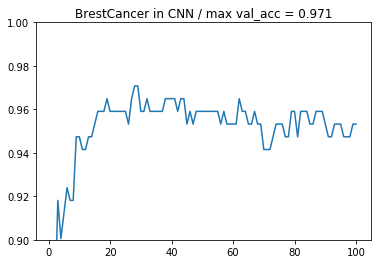

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from keras.layers import Conv1D, BatchNormalization, Activation, MaxPool1D, Flatten, Dense, Input
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

X, y = load_breast_cancer(return_X_y=True)
X = X.reshape(-1, 30, 1)
y = to_categorical(y.reshape(-1, 1))
# featurewiseな標準化
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

def create_single_module(input_tensor, output_channel):
    x = Conv1D(output_channel, kernel_size=3)(input_tensor)
    x = BatchNormalization()(x)
    return Activation("relu")(x)

input = Input(shape=(30, 1)) # Brest-cancerは30次元
x = create_single_module(input, 8) # 30->28 dim
x = MaxPool1D(2)(x) # 28 -> 14dim
x = create_single_module(x, 16) # 14 -> 12
x = create_single_module(x, 16) # 12 -> 10
x = MaxPool1D(2)(x) # 10 -> 5
x = create_single_module(x, 32)
x = Flatten()(x)
x = Dense(2, activation="softmax")(x)

model = Model(input, x)
model.compile(Adam(lr=1e-3), loss="binary_crossentropy", metrics=["acc"])
history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test)).history

max_val_acc = max(history["val_acc"])
plt.plot(np.arange(100)+1, history["val_acc"])
plt.ylim((0.9, 1))
plt.title(f"BrestCancer in CNN / max val_acc = {max_val_acc:.3}")
plt.show()

Train on 398 samples, validate on 171 samples
Epoch 1/100
398/398 [==============================] - 1s 2ms/step - loss: 2.3395 - acc: 0.3505 - val_loss: 2.1979 - val_acc: 0.7485
Epoch 2/100
398/398 [==============================] - 0s 229us/step - loss: 2.1882 - acc: 0.4095 - val_loss: 2.0978 - val_acc: 0.7427
Epoch 3/100
398/398 [==============================] - 0s 234us/step - loss: 2.0637 - acc: 0.5251 - val_loss: 2.0023 - val_acc: 0.8070
Epoch 4/100
398/398 [==============================] - 0s 231us/step - loss: 1.9401 - acc: 0.6131 - val_loss: 1.9103 - val_acc: 0.8070
Epoch 5/100
398/398 [==============================] - 0s 229us/step - loss: 1.8391 - acc: 0.6583 - val_loss: 1.8234 - val_acc: 0.8246
Epoch 6/100
398/398 [==============================] - 0s 234us/step - loss: 1.7223 - acc: 0.7864 - val_loss: 1.7367 - val_acc: 0.8772
Epoch 7/100
398/398 [==============================] - 0s 226us/step - loss: 1.6157 - acc: 0.8317 - val_loss: 1.6525 - val_acc: 0.8947
Epoch 8/100

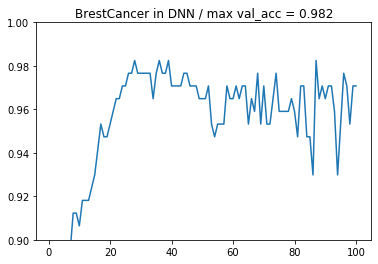

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Input, Activation, BatchNormalization
from keras.models import Model
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

X, y = load_breast_cancer(return_X_y=True)
y = to_categorical(y.reshape(-1, 1))
# featurewiseな標準化
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

def create_single_dnn_module(input_tensor, hidden_units, l2_param):
    x = Dense(hidden_units, kernel_regularizer=l2(l2_param))(input_tensor)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    return x

input = Input(shape=(30,))
x = create_single_dnn_module(input, 25, 3e-2)
x = create_single_dnn_module(x, 20, 2e-2)
x = create_single_dnn_module(x, 12, 1.5e-2)
x = create_single_dnn_module(x, 8, 1e-2)
x = create_single_dnn_module(x, 4, 5e-3)
x = Dense(2, activation="softmax")(x)

model = Model(input, x)
model.compile(Adam(lr=1e-3), loss="binary_crossentropy", metrics=["acc"])
history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test)).history

max_val_acc = max(history["val_acc"])
plt.plot(np.arange(100)+1, history["val_acc"])
plt.ylim((0.9, 1))
plt.title(f"BrestCancer in DNN / max val_acc = {max_val_acc:.3}")
plt.show()

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import numpy as np

X, y = load_breast_cancer(return_X_y=True)
# featurewiseな標準化
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# グリッドサーチのパラメーター
params = [{"kernel":["poly"], "degree":[2,3,4,5,6],"gamma":[1e-4, 1e-2, 1],
           "C":[1e-2, 1, 100, 10000]}]
clf = GridSearchCV(SVC(), params, scoring="accuracy")
clf.fit(X, y)

for mean, std, params in zip(clf.cv_results_['mean_test_score'],
                            clf.cv_results_['std_test_score'], clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
            % (mean, std * 2, params))

0.627 (+/-0.008) for {'C': 0.01, 'degree': 2, 'gamma': 0.0001, 'kernel': 'poly'}
0.627 (+/-0.008) for {'C': 0.01, 'degree': 2, 'gamma': 0.01, 'kernel': 'poly'}
0.849 (+/-0.047) for {'C': 0.01, 'degree': 2, 'gamma': 1, 'kernel': 'poly'}
0.627 (+/-0.008) for {'C': 0.01, 'degree': 3, 'gamma': 0.0001, 'kernel': 'poly'}
0.631 (+/-0.014) for {'C': 0.01, 'degree': 3, 'gamma': 0.01, 'kernel': 'poly'}
0.938 (+/-0.022) for {'C': 0.01, 'degree': 3, 'gamma': 1, 'kernel': 'poly'}
0.627 (+/-0.008) for {'C': 0.01, 'degree': 4, 'gamma': 0.0001, 'kernel': 'poly'}
0.631 (+/-0.014) for {'C': 0.01, 'degree': 4, 'gamma': 0.01, 'kernel': 'poly'}
0.807 (+/-0.047) for {'C': 0.01, 'degree': 4, 'gamma': 1, 'kernel': 'poly'}
0.627 (+/-0.008) for {'C': 0.01, 'degree': 5, 'gamma': 0.0001, 'kernel': 'poly'}
0.631 (+/-0.014) for {'C': 0.01, 'degree': 5, 'gamma': 0.01, 'kernel': 'poly'}
0.926 (+/-0.026) for {'C': 0.01, 'degree': 5, 'gamma': 1, 'kernel': 'poly'}
0.627 (+/-0.008) for {'C': 0.01, 'degree': 6, 'gamma': 0